In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
crop_filepath = "C:\\Users\\Dhruv\\Machine-Learning\\code\\files\\project_files\\crop_rec.csv"
data = pd.read_csv(crop_filepath)

In [3]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
data.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [9]:
data.profile_report()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


# Visualization

<AxesSubplot:title={'center':'Correlation between features'}>

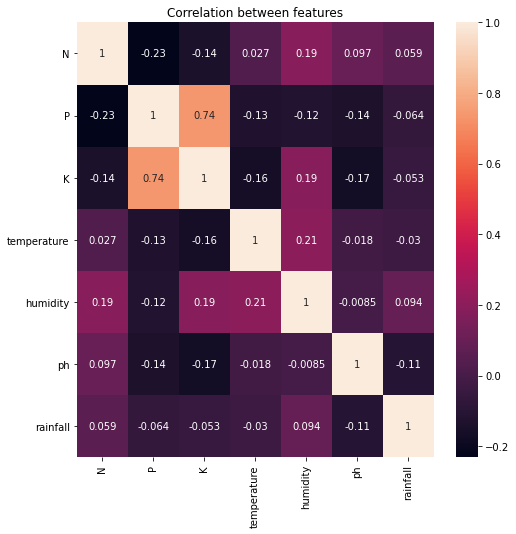

In [10]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data.corr()
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'crops')

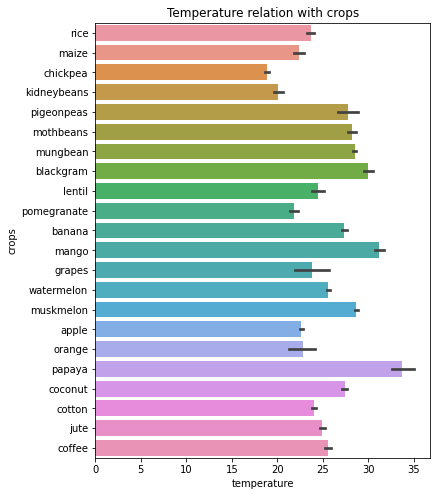

In [11]:
plt.figure(figsize=(6,8))
plt.title("Temperature relation with crops")
sns.barplot(y="label", x="temperature", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

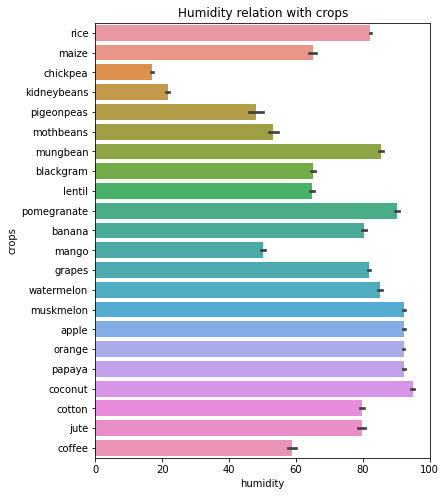

In [12]:
plt.figure(figsize=(6,8))
plt.title("Humidity relation with crops")
sns.barplot(y="label", x="humidity", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

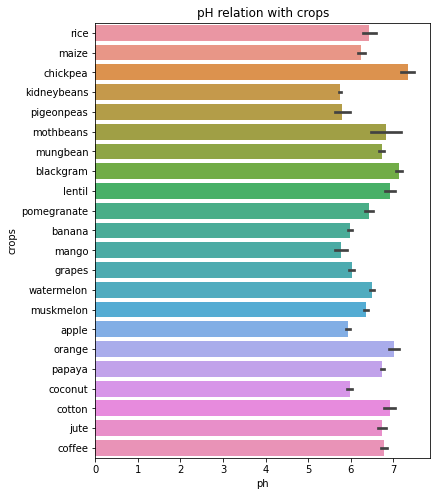

In [13]:
plt.figure(figsize=(6,8))
plt.title("pH relation with crops")
sns.barplot(y="label", x="ph", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

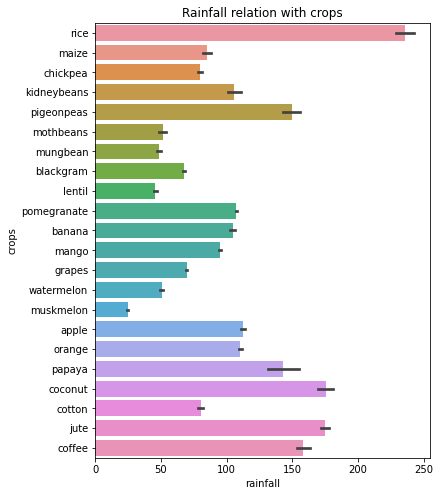

In [14]:
plt.figure(figsize=(6,8))
plt.title("Rainfall relation with crops")
sns.barplot(y="label", x="rainfall", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'Crops')

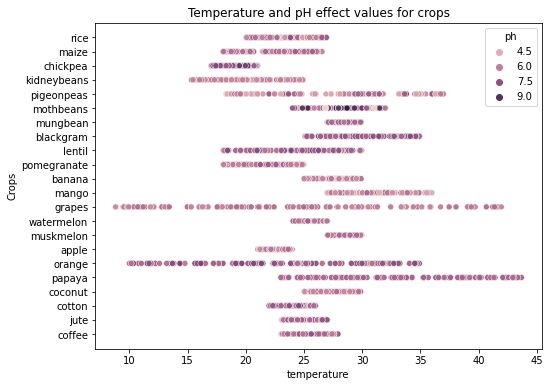

In [15]:
plt.figure(figsize=(8,6))
plt.title("Temperature and pH effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="ph")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

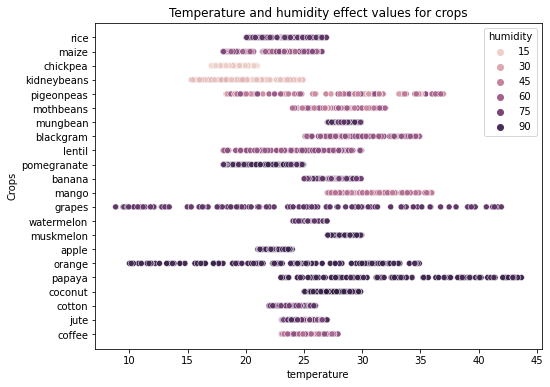

In [16]:
plt.figure(figsize=(8,6))
plt.title("Temperature and humidity effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="humidity")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

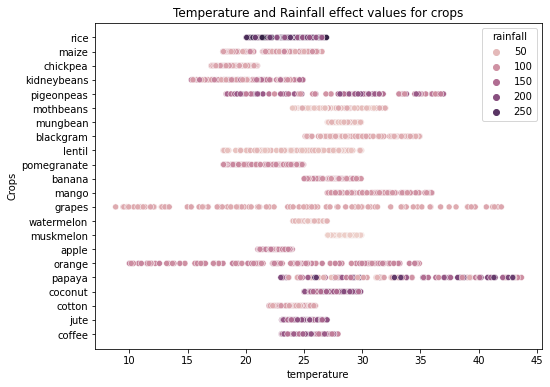

In [17]:
plt.figure(figsize=(8,6))
plt.title("Temperature and Rainfall effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="rainfall")
plt.ylabel("Crops")

Text(0.5, 1.0, 'Values of N, P, K in soil')

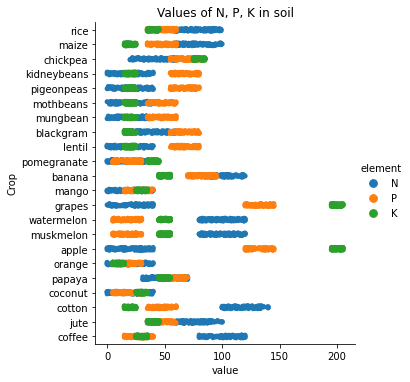

In [18]:
data_npk = pd.melt(data, id_vars=["label"], value_vars=["N", "P", "K"],var_name='element', value_name='value')
sns.catplot(y="label", x="value", hue="element", data=data_npk)
plt.ylabel("Crop")
plt.title("Values of N, P, K in soil")

# Predictions

In [19]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)

In [20]:
features = data.drop("label", axis=1)
target = data.label

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

## Linear Regression

In [22]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred= lr.score(X_test, y_test)

print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

Training score: 0.303
Test score: 0.276


## Decision Tree Classifier

In [23]:
tree = DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train, y_train)
tree_pred= tree.score(X_test, y_test)

print("Training score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Training score: 1.000
Test score: 0.987


## Random Forests

In [24]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0).fit(X_train, y_train)
rf_pred= rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.989


## GradientBoostingClassifier

In [25]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=4, max_features=2, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.999
Test score: 0.982


## Support Vector Classifier

In [26]:
svm = SVC(C=100, gamma=0.001).fit(X_train, y_train)
svm_pred= svm.score(X_test, y_test)

print("Training score: {:.3f}".format(svm.score(X_train, y_train)))
print("Test score: {:.3f}".format(svm.score(X_test, y_test)))

Training score: 0.998
Test score: 0.982


## Logistic regression

In [27]:
log_reg = LogisticRegression(C=0.1, max_iter=100000).fit(X_train, y_train)
log_reg_pred= log_reg.score(X_test, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test, y_test)))

Training score: 0.993
Test score: 0.973


## MLPClassifer

In [34]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=10000, alpha=0.01,hidden_layer_sizes=[100,50])
mlp.fit(X_train_scaled, y_train)

mlp_pred= mlp.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Training score: 0.999
Test score: 0.975


In [30]:
predictions_acc = { "Model": ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVC', 'Logistic Regression', 'MLP'],
"Accuracy": [tree_pred, rf_pred, gbr_pred, svm_pred, log_reg_pred, mlp_pred]}

In [31]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])

In [32]:
model_acc

Model  Accuracy
0        Decision Tree  0.987273
1        Random Forest  0.989091
2    Gradient Boosting  0.981818
3                  SVC  0.981818
4  Logistic Regression  0.972727
5                  MLP  0.130909

In [33]:
print("Average accuracy (Ex Logistic regression): {:.3f}".format(model_acc.Accuracy.mean()))

Average accuracy (Ex Logistic regression): 0.841
